# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [3]:
fitbit["Steps"].groupby(fitbit["Months_encoded"]).median()


Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

In [4]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit.groupby(["Work_or_Weekend","Months_encoded"])["Steps"].mean()

Work_or_Weekend  Months_encoded
0                1                  9618.400000
                 2                 10882.250000
                 3                  4941.250000
                 4                  8285.666667
                 5                 15005.900000
                 6                 12717.125000
                 7                  8851.000000
                 8                 12462.900000
                 9                  7846.750000
                 10                 9441.333333
                 11                 9624.000000
                 12                 9725.875000
1                1                 10022.380952
                 2                  8210.363636
                 3                 12181.347826
                 4                 15133.333333
                 5                  8531.619048
                 6                 12470.363636
                 7                  9312.391304
                 8                 11166.619048
        

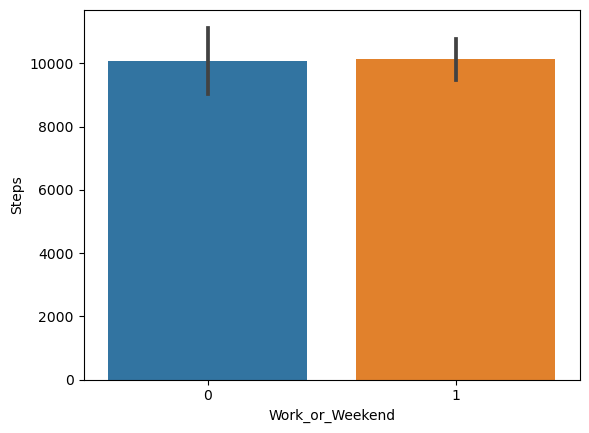

In [5]:
# sns.histplot(data=fitbit, x="Days", hue="Steps")
# sns.histplot(data=fitbit, x="Months_encoded", hue="Steps")

# figure_2 =sns.countplot(x="Work_or_Weekend", data = fitbit, palette = "magma")

figure_2 = sns.barplot(x="Work_or_Weekend", y="Steps", data=fitbit)

figure_2.figure.savefig("../Figures/figure_2.jpg", dpi=1000)


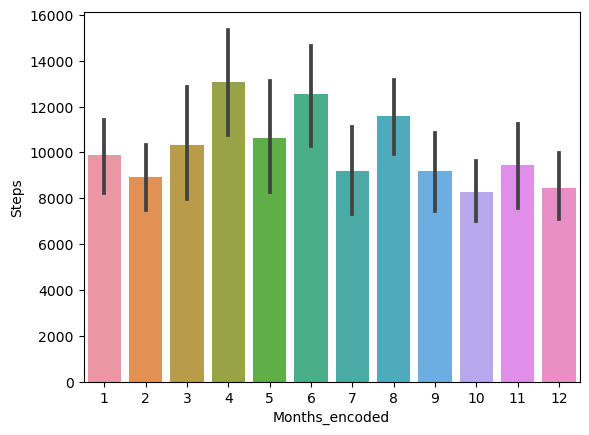

In [6]:
figure_3 = sns.barplot(x="Months_encoded", y="Steps", data=fitbit)
figure_3.figure.savefig("../Figures/figure_3.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

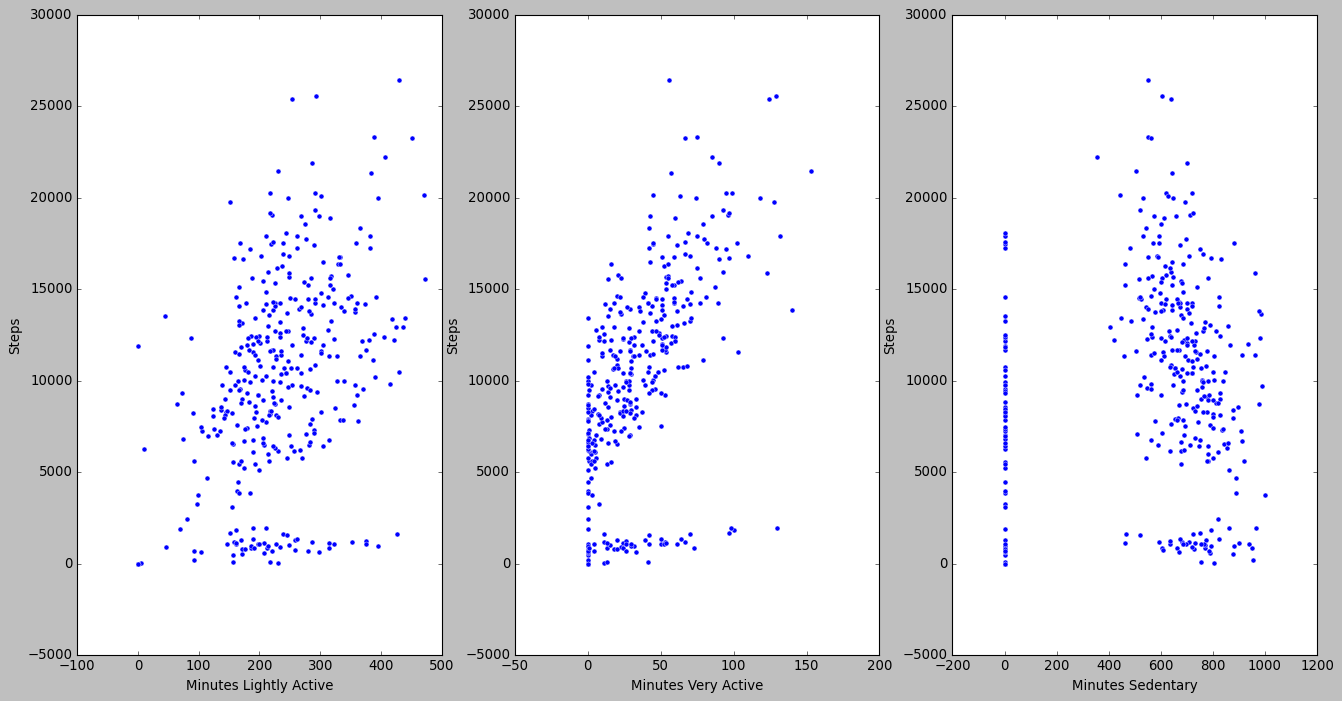

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

# list_1 = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]

# for i in list_1:
#     sns.scatterplot(x= i,  y="Steps", data = fitbit, ax=axs[i])
sns.scatterplot(x="Minutes Lightly Active", y="Steps", data = fitbit, ax=axs[0])
sns.scatterplot(x="Minutes Very Active", y="Steps", data = fitbit, ax=axs[1])
sns.scatterplot(x="Minutes Sedentary", y="Steps", data = fitbit, ax=axs[2])

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [11]:
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES

titanic.select_dtypes("number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [13]:
categorical = titanic.select_dtypes('category')
categorical

#There are not!

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [14]:
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

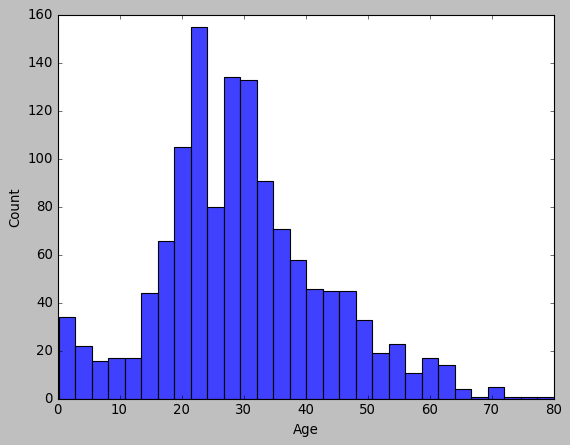

In [15]:
sns.histplot(x=titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

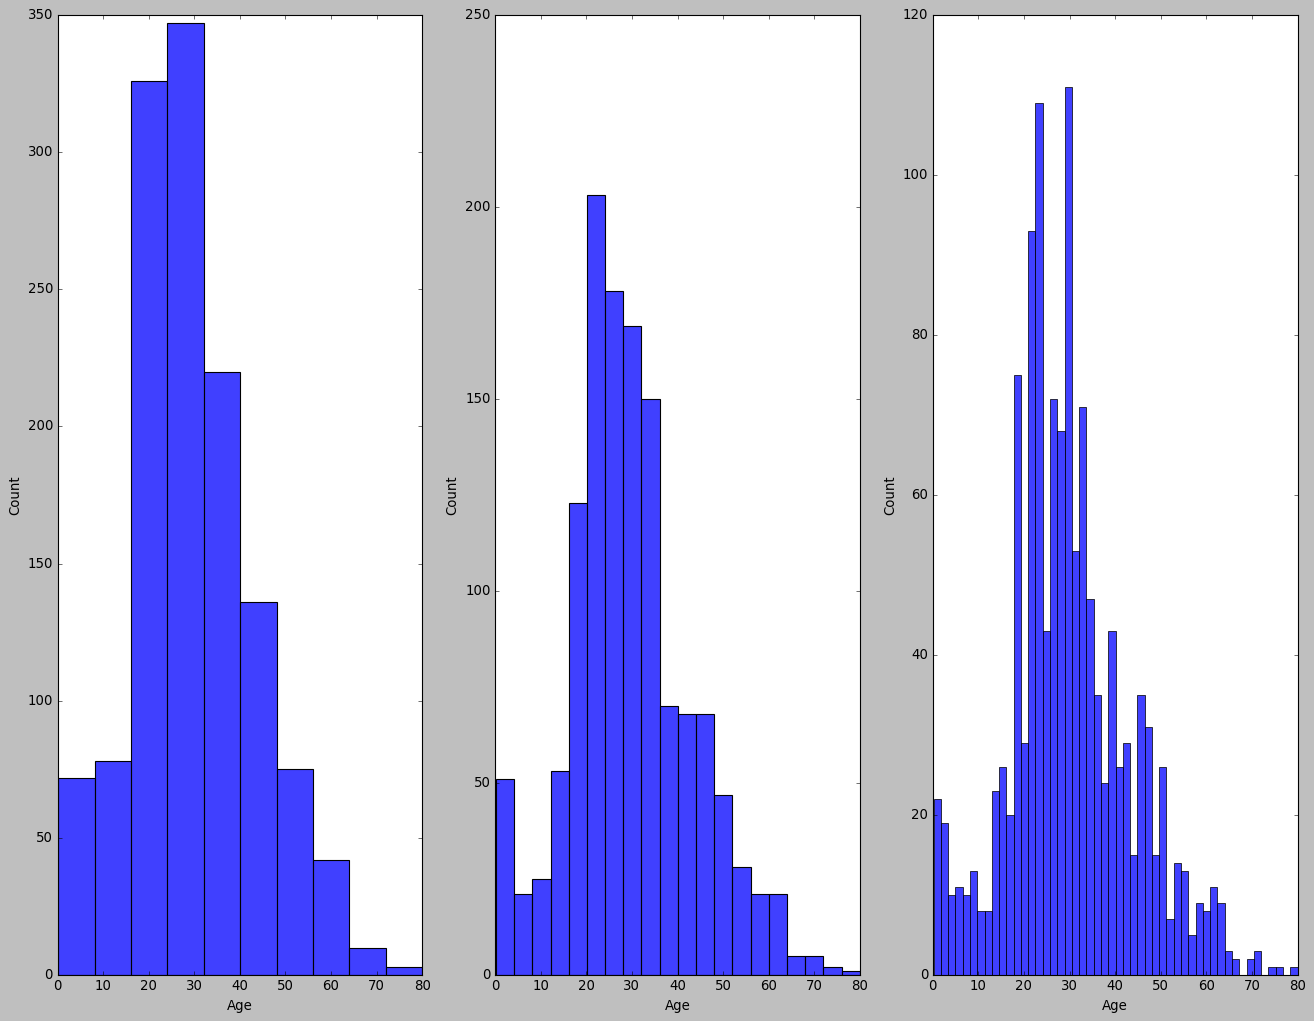

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))

sns.histplot(x=titanic.Age, bins = 10, ax=axs[0])
sns.histplot(x=titanic.Age, bins = 20, ax=axs[1])
sns.histplot(x=titanic.Age, bins = 50, ax=axs[2])



#### How does the bin size affect your plot?

In [17]:
"""
With a higher bin, the detail in the age ranges is bigger.
"""

'\nWith a higher bin, the detail in the age ranges is bigger.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

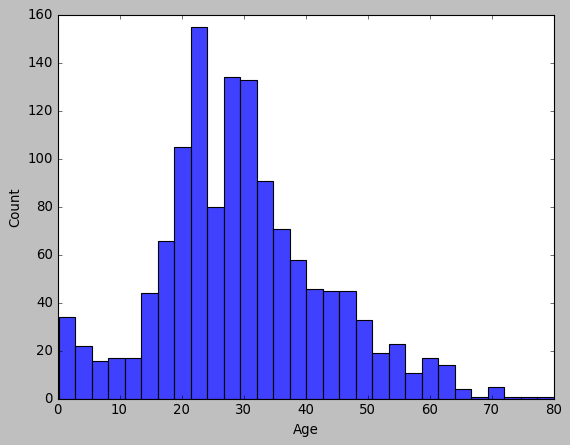

In [18]:
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:title={'center':'Genders'}>

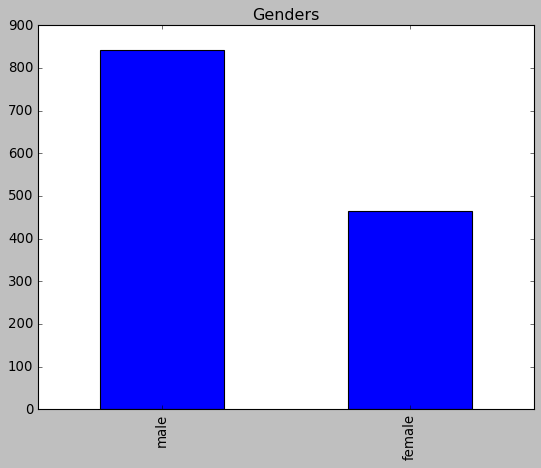

In [19]:
# Method 1 - matplotlib
gender = titanic["Gender"].value_counts()

titanic["Gender"].value_counts().plot(kind="bar", title="Genders")

<AxesSubplot:xlabel='Gender', ylabel='count'>

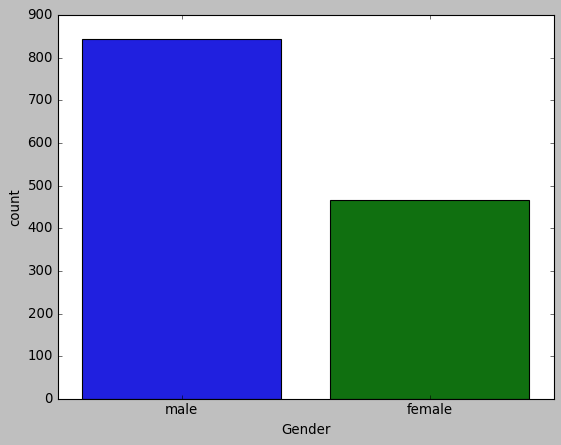

In [20]:
# Method 2 - seaborn
sns.countplot(x=titanic["Gender"])

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

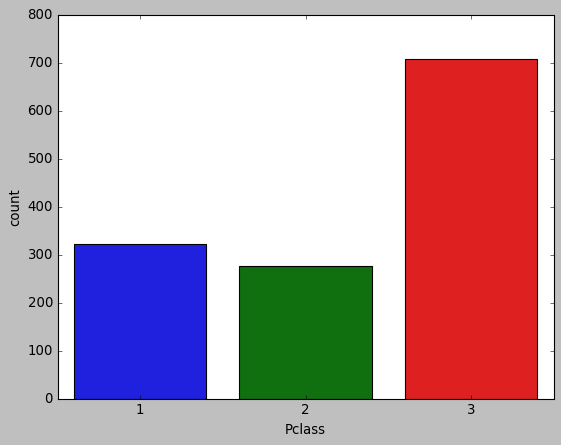

In [21]:
sns.countplot(x=titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

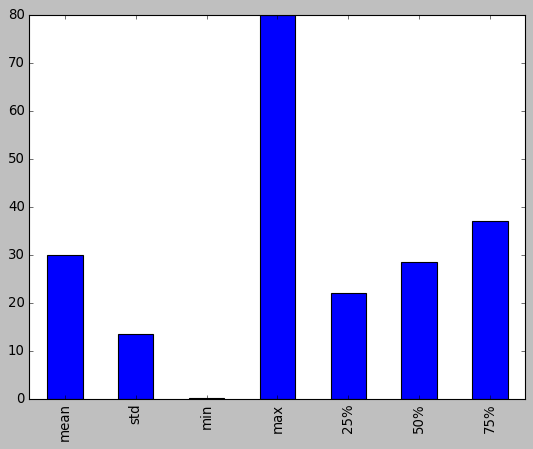

In [55]:
stats = titanic["Age"].describe().loc[["mean", "std", "min", "max", "25%", "50%", "75%"]]
stats

stats.plot(kind="bar")

# stats = sns.histplot(x=titanic.Age, kde=True) 

# stats.axvline(x=titanic.Age.mean(), c="red", label="mean")
# stats.axvline(x=titanic.Age.median(), c="purple", label="median")
# stats.axvline(x=titanic.Age.max(), c="blue", label="max") 

# plt.legend();

In [53]:
"""
If we just wnat to see the statistics, I would use a Plot Bar; 
however, I prefer to use a histplot with the statistics as KDE being related to the age columns.
"""

'\nIf we just wnat to see the statistics, I would use a Plot Bar; however, I prefer to use a histplot with the statistics as KBE being related to the age columns.\n'

#### What does the last plot tell you about the feature `Age`?

In [24]:
"""
The mean is around 28 and the median around 30 with a std around 13. 


"""

'\nThe most of the people at the Titanic was between the 18 and 35 years old. \nThe mean is around 28 and the median aroun 30. \nThere is a decreasing tendency of the number of people from age 30, to 80.\n\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

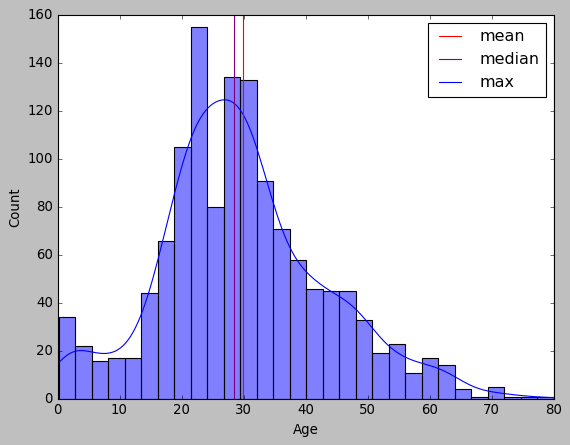

In [42]:
stats = sns.histplot(x=titanic.Age, kde=True) 

stats.axvline(x=titanic.Age.mean(), c="red", label="mean")
stats.axvline(x=titanic.Age.median(), c="purple", label="median")
stats.axvline(x=titanic.Age.max(), c="blue", label="max") 

plt.legend();


#### What additional information does the last plot provide about feature `Age`?

In [26]:
"""
The most of the people at the Titanic was between the 18 and 35 years old. 
There is a decreasing tendency of the number of people from age 30, to 80.
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

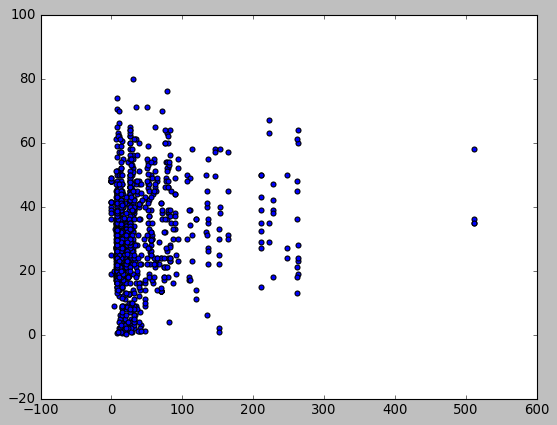

In [27]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare, y=titanic.Age);

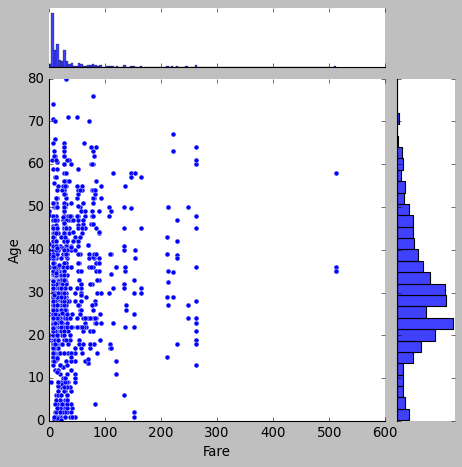

In [28]:
# Method 2 - seaborn
sns.jointplot(data=titanic, x= "Fare", y= "Age")

#### Plot the correlation matrix using seaborn.

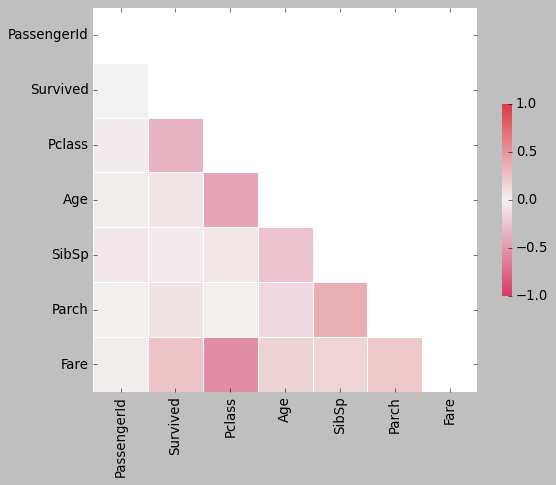

In [29]:
corr = titanic.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            vmin=-1, 
            cbar_kws={"shrink": .5} 
);

#### What are the most correlated features?

In [30]:
"""
The most correlated features are related to Pclass; 
specially the Fare an the Age. There is also clear correlation between the Pclass and if the passenger survived or not.

"""

'\nThe most correlated features are related to Pclass; \nspecially the Fare an the Age. There is also clear correlation between the Pclass and if the passenger survived or not.\n\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

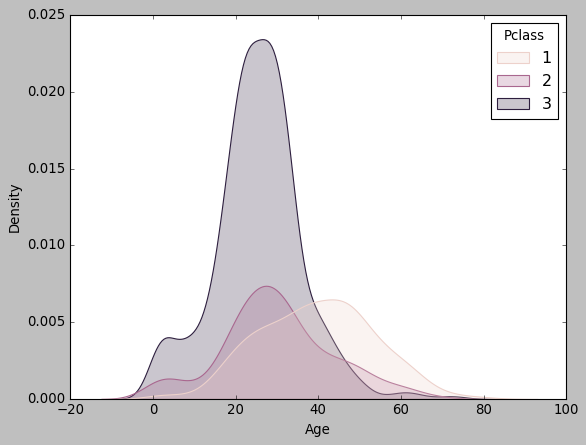

In [31]:
sns.kdeplot(x=titanic.Age, hue=titanic.Pclass, fill=True);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

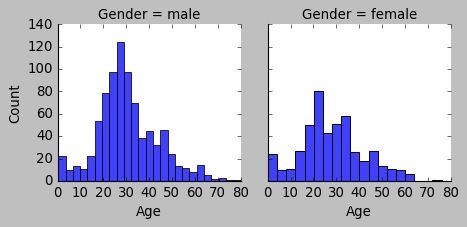

In [34]:



sns.FacetGrid(titanic, col="Gender").map_dataframe(sns.histplot,"Age")


